<a href="https://colab.research.google.com/github/youngmantis/Computional-Drug-Discovery/blob/main/CDD_Arachidonate_5_lipoxygenase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery**
# **Data collection, pre-processing. EDA and Descriptor calculations of Arachidonate 5-lipoxygenase bioactivity data**

**Alex Oyinola Adedayo**

Inspired from https://github.com/dataprofessor/bioinformatics_freecodecamp/

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)


In this Jupyter notebook, we will collect the target and the bioactivity data from ChEMBL database and pre-process it. We will also do exploratory data analysis and prepare descriptor dataset which will be used for prediction.

**Notebook Contents**:


* Data Collection and Pre-Processing from the ChEMBL Database.
* Exploratory Data Analysis
* Descriptor Dataset Preparation





## **Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.**

In [ ]:
pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.19.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


## **Import Libraries**

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Target search for Arachidonate 5-lipoxygenase**










In [ ]:
target = new_client.target
target_query = target.search('Arachidonate 5-lipoxygenase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,5-lipoxygenase/FLAP,36.0,False,CHEMBL2111402,"[{'accession': 'P09917', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1,"[{'xref_id': 'P09917', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 5-lipoxygenase,35.0,False,CHEMBL215,"[{'accession': 'P09917', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,"[{'xref_id': 'P12527', 'xref_name': None, 'xre...",Rattus norvegicus,Arachidonate 5-lipoxygenase,35.0,False,CHEMBL312,"[{'accession': 'P12527', 'component_descriptio...",SINGLE PROTEIN,10116.0
3,[],Mus musculus,Arachidonate 5-lipoxygenase,35.0,False,CHEMBL5211,"[{'accession': 'P48999', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,[],Sus scrofa,Arachidonate 5-lipoxygenase,35.0,False,CHEMBL3879862,"[{'accession': 'K7GQZ4', 'component_descriptio...",SINGLE PROTEIN,9823.0
...,...,...,...,...,...,...,...,...,...
2077,[],Homo sapiens,NEK kinase,1.0,False,CHEMBL4524130,"[{'accession': 'P51955', 'component_descriptio...",PROTEIN FAMILY,9606.0
2078,[],Homo sapiens,Nicotinic Acetylcholine Receptor,1.0,False,CHEMBL4524133,"[{'accession': 'P02708', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606.0
2079,[],Homo sapiens,Neuronal acetylcholine receptor,1.0,False,CHEMBL4804182,"[{'accession': 'P17787', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606.0
2080,[],Homo sapiens,26S proteasome,0.0,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606.0


## **Select and retrieve bioactivity data for Human Arachidonate 5-lipoxygenase (second entry)**

We will assign the second entry (which corresponds to the target protein, Human Arachidonate 5-lipoxygenase) to the selected_target variable

In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL2111402'

Retrieve only bioactivity data for Human Arachidonate 5-lipoxygenase (CHEMBL289) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,715668,[],CHEMBL700005,Inhibition of calcium ionophore (A23187) stimu...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,12.0
1,None,None,715669,[],CHEMBL873225,Human whole blood was stimulated with calcium ...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,4.42
2,None,None,716931,[],CHEMBL700005,Inhibition of calcium ionophore (A23187) stimu...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,0.34
3,None,None,716932,[],CHEMBL873225,Human whole blood was stimulated with calcium ...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,716934,[],CHEMBL700005,Inhibition of calcium ionophore (A23187) stimu...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,10.0
5,None,None,716935,[],CHEMBL873225,Human whole blood was stimulated with calcium ...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,0.23
6,None,None,718151,[],CHEMBL873225,Human whole blood was stimulated with calcium ...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,0.84
7,None,None,721438,[],CHEMBL700005,Inhibition of calcium ionophore (A23187) stimu...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,11.0
8,None,None,721439,[],CHEMBL873225,Human whole blood was stimulated with calcium ...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,0.18
9,None,None,722484,[],CHEMBL700005,Inhibition of calcium ionophore (A23187) stimu...,F,None,None,BAO_0000190,...,Homo sapiens,5-lipoxygenase/FLAP,9606,None,None,IC50,uM,UO_0000065,None,4.0


Save the resulting bioactivity data to a CSV file bioactivity_data.csv.






In [ ]:
df.to_csv('Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**

If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [ ]:
df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

df2

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

df2_nr

df2_nr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 35
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                0 non-null      object
 1   activity_comment           0 non-null      object
 2   activity_id                20 non-null     int64 
 3   activity_properties        20 non-null     object
 4   assay_chembl_id            20 non-null     object
 5   assay_description          20 non-null     object
 6   assay_type                 20 non-null     object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               20 non-null     object
 10  bao_format                 20 non-null     object
 11  bao_label                  20 non-null     object
 12  canonical_smiles           20 non-null     object
 13  data_validity_comment      0 non-null      object
 14  data_validit

## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,12000.0
2,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,340.0
4,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,10000.0
6,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,840.0
7,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,11000.0
9,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,4000.0
11,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,100.0
13,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,10000.0
15,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,13000.0
17,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,12000.0


Saves dataframe to CSV file

In [ ]:
df3.to_csv('Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv', index=False)

**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
df4 = pd.read_csv('Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,12000.0,inactive
1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,340.0,active
2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,10000.0,inactive
3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,840.0,active
4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,11000.0,inactive
5,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,4000.0,intermediate
6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,100.0,active
7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,10000.0,inactive
8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,13000.0,inactive
9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,12000.0,inactive


Saves dataframe to CSV file

In [ ]:
df5.to_csv('Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip Arachidonate 5-lipoxygenase.zip *.csv

	zip warning: name not matched: 5-lipoxygenase.zip
  adding: Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv (deflated 78%)
  adding: Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: Cytochrome P450 2D6_03_bioactivity_data_curated.csv (deflated 78%)


In [ ]:
! ls -l

total 52
-rw-r--r-- 1 root root 17803 Sep  1 14:56 'Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root  1790 Sep  1 15:13 'Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root  1970 Sep  1 15:15 'Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root  4548 Sep  1 15:15  Arachidonate.zip
-rw-r--r-- 1 root root  1790 Sep  1 14:46 'Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root  1970 Sep  1 14:46 'Cytochrome P450 2D6_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root  3226 Sep  1 14:46  Cytochrome.zip
drwxr-xr-x 1 root root  4096 Aug 30 13:25  sample_data


# **Exploratory Data Analysis**
Here, the Descriptor Calculation and Exploratory Data Analysis will be performed.

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-09-01 15:15:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   194MB/s    in 0.4s    

2023-09-01 15:15:58 (194 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

In [ ]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL444304,12000.0,inactive,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
1,CHEMBL3349447,340.0,active,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...
2,CHEMBL38949,10000.0,inactive,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...
3,CHEMBL39473,840.0,active,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
4,CHEMBL36331,11000.0,inactive,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...
5,CHEMBL289751,4000.0,intermediate,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
6,CHEMBL3349448,100.0,active,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...
7,CHEMBL38545,10000.0,inactive,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
8,CHEMBL38513,13000.0,inactive,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...
9,CHEMBL38884,12000.0,inactive,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
!pip install rdkit-pypi -qqq
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.2 MB 1.5 MB/s 


### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,586.197,9.6191,1.0,4.0
1,485.137,8.5579,0.0,4.0
2,628.622,8.5167,1.0,7.0
3,537.125,7.8609,1.0,5.0
4,600.206,7.9248,1.0,8.0
5,543.154,7.9224,1.0,6.0
6,529.146,8.0127,1.0,5.0
7,593.214,9.0756,1.0,6.0
8,594.177,7.8633,1.0,7.0
9,644.237,9.0165,1.0,7.0


### **Combine DataFrames**

Combine the df_lipinski and df5 DataFrames.

In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,12000.0,inactive,586.197,9.6191,1.0,4.0
1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,340.0,active,485.137,8.5579,0.0,4.0
2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,10000.0,inactive,628.622,8.5167,1.0,7.0
3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,840.0,active,537.125,7.8609,1.0,5.0
4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,11000.0,inactive,600.206,7.9248,1.0,8.0
5,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,4000.0,intermediate,543.154,7.9224,1.0,6.0
6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,100.0,active,529.146,8.0127,1.0,5.0
7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,10000.0,inactive,593.214,9.0756,1.0,6.0
8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,13000.0,inactive,594.177,7.8633,1.0,7.0
9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,12000.0,inactive,644.237,9.0165,1.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       20.000000
mean      6156.500000
std       6189.726016
min         30.000000
25%        177.500000
50%       5500.000000
75%      11250.000000
max      17000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-38-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,586.197,9.6191,1.0,4.0,12000.0
1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,active,485.137,8.5579,0.0,4.0,340.0
2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,628.622,8.5167,1.0,7.0,10000.0
3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,active,537.125,7.8609,1.0,5.0,840.0
4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,inactive,600.206,7.9248,1.0,8.0,11000.0
5,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,intermediate,543.154,7.9224,1.0,6.0,4000.0
6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,active,529.146,8.0127,1.0,5.0,100.0
7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,593.214,9.0756,1.0,6.0,10000.0
8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,594.177,7.8633,1.0,7.0,13000.0
9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,644.237,9.0165,1.0,7.0,12000.0


In [ ]:
df_norm.standard_value_norm.describe()

count       20.000000
mean      6156.500000
std       6189.726016
min         30.000000
25%        177.500000
50%       5500.000000
75%      11250.000000
max      17000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-34-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,586.197,9.6191,1.0,4.0,4.920819
1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,active,485.137,8.5579,0.0,4.0,6.468521
2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,628.622,8.5167,1.0,7.0,5.000000
3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,active,537.125,7.8609,1.0,5.0,6.075721
4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,inactive,600.206,7.9248,1.0,8.0,4.958607
5,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,intermediate,543.154,7.9224,1.0,6.0,5.397940
6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,active,529.146,8.0127,1.0,5.0,7.000000
7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,593.214,9.0756,1.0,6.0,5.000000
8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,594.177,7.8633,1.0,7.0,4.886057
9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,644.237,9.0165,1.0,7.0,4.920819


In [ ]:
df_final.pIC50.describe()

count    20.000000
mean      5.807506
std       0.979256
min       4.769551
25%       4.949160
50%       5.276421
75%       6.750933
max       7.522879
Name: pIC50, dtype: float64

Write this to CSV file.

In [ ]:
df_final.to_csv('Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Removing the ``intermediate`` class from the data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,586.197,9.6191,1.0,4.0,4.920819
1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,active,485.137,8.5579,0.0,4.0,6.468521
2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,628.622,8.5167,1.0,7.0,5.000000
3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,active,537.125,7.8609,1.0,5.0,6.075721
4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,inactive,600.206,7.9248,1.0,8.0,4.958607
6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,active,529.146,8.0127,1.0,5.0,7.000000
7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,593.214,9.0756,1.0,6.0,5.000000
8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,594.177,7.8633,1.0,7.0,4.886057
9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,644.237,9.0165,1.0,7.0,4.920819
10,CHEMBL290170,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)NC(=O)N(...,active,516.151,7.7087,2.0,4.0,6.823909


Write this to CSV file.

In [ ]:
df_2class.to_csv('Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

**Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**



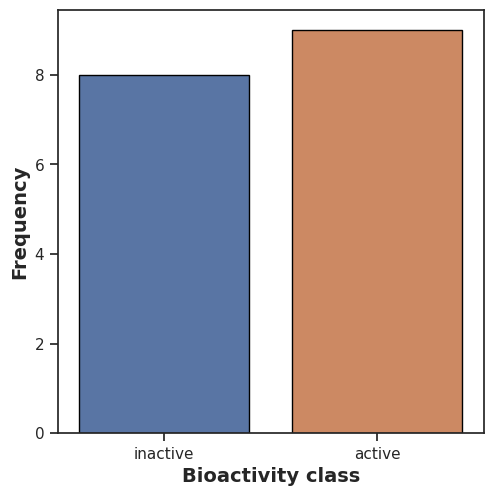

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

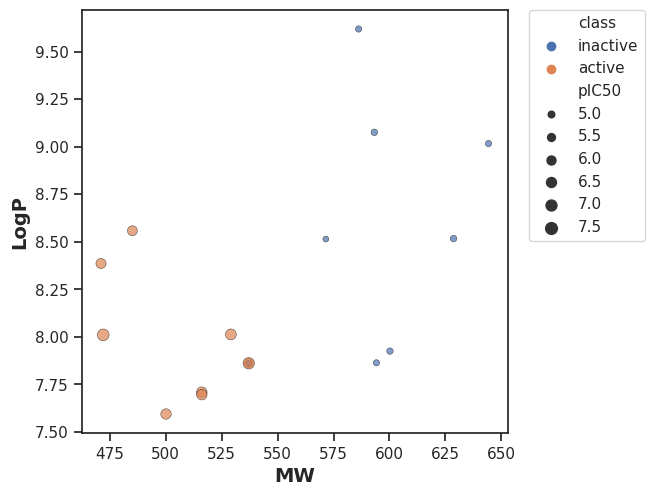

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()

It can be seen that the 2 bioactivity classes are  spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

### **Box plots**

#### **pIC50 value**

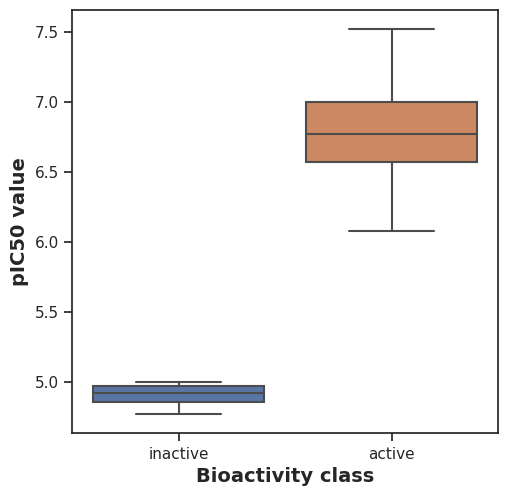

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,72.0,0.000621,0.05,Different distribution (reject H0)


#### **MW**

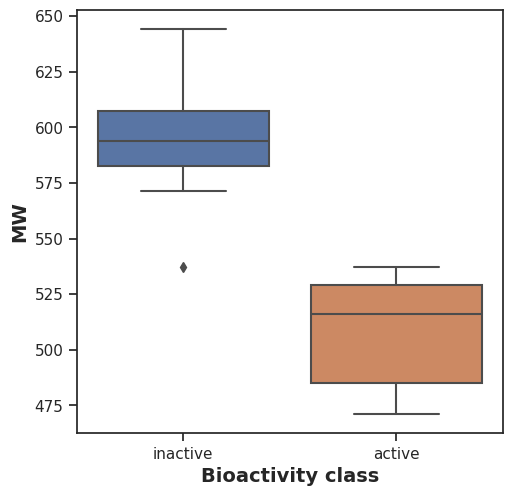

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1.0,0.000875,0.05,Different distribution (reject H0)


#### **LogP**

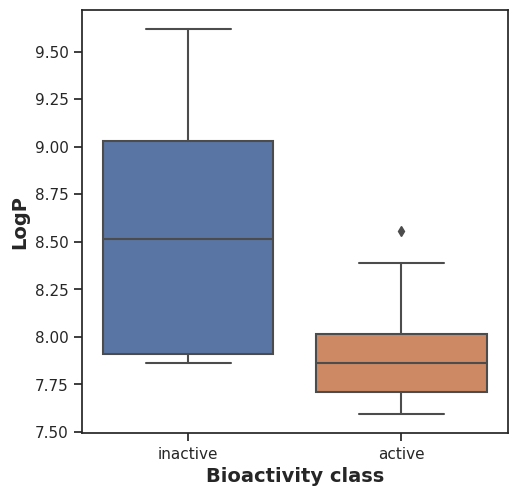

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,15.0,0.047989,0.05,Different distribution (reject H0)


#### **NumHDonors**

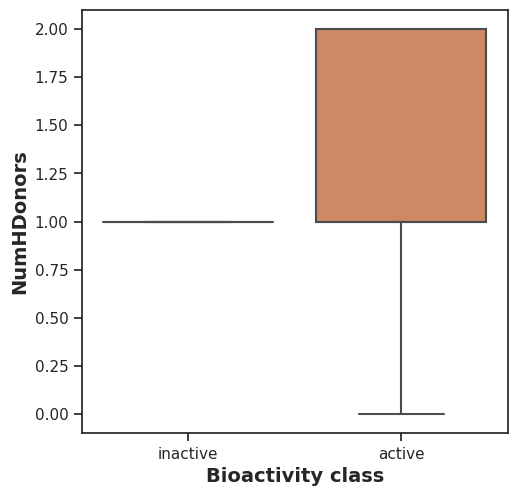

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,44.0,0.33006,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

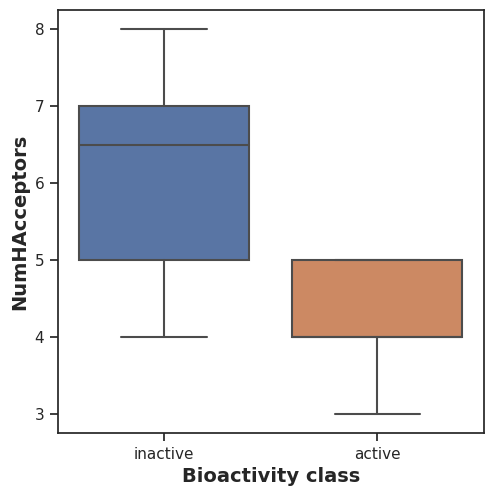

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,8.0,0.006483,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

3 (MW, LogP and NumHAcceptors) out of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives** while the NumHDonors descriptor exhibited ***no statistically significant difference*** between the **actives** and **inactives**

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv (deflated 78%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 39%)
  adding: Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv (deflated 72%)
  adding: Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv (deflated 72%)
  adding: Cytochrome P450 2D6_03_bioactivity_data_curated.csv (deflated 78%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv (

# **Descriptor Calculation and Dataset Preparation**
 Here, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. We will also be preparing this into a dataset for subsequent model building.

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-09-01 15:34:35--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-09-01 15:34:35--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   138MB/s    in 0.2s    

2023-09-01 15:34:36 (138 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-09-01 15:34:36--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [ ]:
df6 = pd.read_csv('Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL444304,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,586.197,9.6191,1.0,4.0,4.920819
1,1,CHEMBL3349447,CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1...,active,485.137,8.5579,0.0,4.0,6.468521
2,2,CHEMBL38949,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,628.622,8.5167,1.0,7.0,5.000000
3,3,CHEMBL39473,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,active,537.125,7.8609,1.0,5.0,6.075721
4,4,CHEMBL36331,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cs...,inactive,600.206,7.9248,1.0,8.0,4.958607
5,5,CHEMBL289751,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,intermediate,543.154,7.9224,1.0,6.0,5.397940
6,6,CHEMBL3349448,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)/C=N/OCC...,active,529.146,8.0127,1.0,5.0,7.000000
7,7,CHEMBL38545,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,inactive,593.214,9.0756,1.0,6.0,5.000000
8,8,CHEMBL38513,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,594.177,7.8633,1.0,7.0,4.886057
9,9,CHEMBL38884,CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cc...,inactive,644.237,9.0165,1.0,7.0,4.920819


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc4ccccc4c3)cc12	CHEMBL444304
CO/N=C/C(C)(C)Cc1c(SC(C)(C)C)c2cc(C(C)C)ccc2n1Cc1ccc(Cl)cc1	CHEMBL3349447
CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cccc(Cl)n3)ccc2n1Cc1ccc(Cl)cc1	CHEMBL38949
CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccncc3)cc12	CHEMBL39473
CC(C)(/C=N/OCC(=O)O)Cc1c(SC(C)(C)C)c2cc(OCc3cscn3)ccc2n1Cc1ccc(Cl)cc1	CHEMBL36331


In [ ]:
! cat molecule.smi | wc -l

20


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL444304 in molecule.smi (1/20). 
Processing CHEMBL3349447 in molecule.smi (2/20). 
Processing CHEMBL38949 in molecule.smi (3/20). Average speed: 2.96 s/mol.
Processing CHEMBL39473 in molecule.smi (4/20). Average speed: 2.74 s/mol.
Processing CHEMBL36331 in molecule.smi (5/20). Average speed: 2.41 s/mol.
Processing CHEMBL289751 in molecule.smi (6/20). Average speed: 2.23 s/mol.
Processing CHEMBL3349448 in molecule.smi (7/20). Average speed: 1.91 s/mol.
Processing CHEMBL38545 in molecule.smi (8/20). Average speed: 1.90 s/mol.
Processing CHEMBL38513 in molecule.smi (9/20). Average speed: 1.77 s/mol.
Processing CHEMBL38884 in molecule.smi (10/20). Average speed: 2.08 s/mol.
Processing CHEMBL290170 in molecule.smi (11/20). Average speed: 1.65 s/mol.
Processing CHEMBL39617 in molecule.smi (12/20). Average speed: 1.77 s/mol.
Processing CHEMBL3349449 in molecule.smi (13/20). Average speed: 1.67 s/mol.
Processing CHEMBL16596 in molecule.smi (14/20). Average speed: 1.61 s/mol.
Pr

In [ ]:
! ls -l

total 108544
-rw-r--r-- 1 root root    17803 Sep  1 14:56 'Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root     1790 Sep  1 15:13 'Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root     1970 Sep  1 15:15 'Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root     3078 Sep  1 15:19 'Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root     2615 Sep  1 15:20 'Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root     4548 Sep  1 15:15  Arachidonate.zip
-rw-r--r-- 1 root root     1790 Sep  1 14:46 'Cytochrome P450 2D6_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root     1970 Sep  1 14:46 'Cytochrome P450 2D6_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root     3078 Sep  1 15:19 'Cytochrome P450 2D6_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root     3226 Sep  1 14:46  Cytochrome.zip
-rw-r--r--

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [ ]:
df6_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df6_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3349447,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL444304,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL38949,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL39473,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL36331,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL289751,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL3349448,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL38545,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL38513,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL290170,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6_X = df6_X.drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [ ]:
df6_Y = df6['pIC50']
df6_Y

0     4.920819
1     6.468521
2     5.000000
3     6.075721
4     4.958607
5     5.397940
6     7.000000
7     5.000000
8     4.886057
9     4.920819
10    6.823909
11    4.769551
12    6.568636
13    5.096910
14    6.769551
15    7.522879
16    5.154902
17    4.769551
18    7.301030
19    6.744727
Name: pIC50, dtype: float64

## **Combining X and Y variable**

In [ ]:
dataset6 = pd.concat([df6_X,df6_Y], axis=1)
dataset6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.468521
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.075721
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.397940
6,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
8,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.886057
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.920819


In [ ]:
dataset6.to_csv('Arachidonate 5-lipoxygenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)